<a href="https://colab.research.google.com/github/MaykonDias/Analise_CancerChina/blob/main/Cancer_china.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("china_cancer_patients_synthetic.csv")

In [5]:
df.isnull().sum()

,0
PatientID,0
Gender,0
Age,0
Province,0
Ethnicity,0
TumorType,0
CancerStage,0
DiagnosisDate,0
TumorSize,0
Metastasis,0


# **Composição dos Tipos de Câncer em um Conjunto de Dados Específico**

O gráfico apresenta que o cancer de pulmão é mais frequente, representando um quarto de todos os casos analisados. Contudo o câncer de mama e de colo de útero aparecetem com a menor represetanção, isto pode representar que as campanhas de prevenção com ambos tipos de cânceres esta tendo uma eficiência.


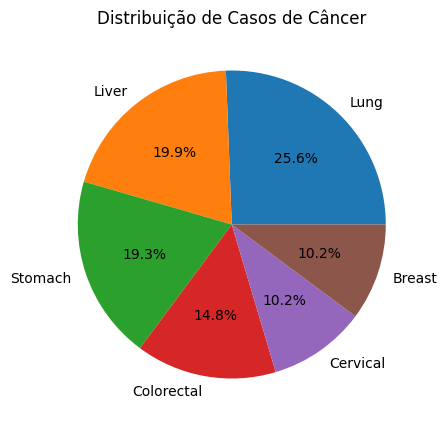

In [6]:
contagem_tumor = (df["TumorType"].value_counts())
plt.figure(figsize=(10,5))
plt.pie(contagem_tumor, autopct="%1.1f%%", labels=contagem_tumor.index)
plt.title("Distribuição de Casos de Câncer")
plt.show()

# **Matriz de Incidência de Câncer por Idade e Tipo de Tumor**

O risco aumenta significamente com o evelhecimento pois as idades de 0 a 39 anos é predominamente por casos mais baixos. Podemos perceber que a partir dessa idade aumenta drasticamente os casos de câncer principalmente o câncer de **Pulmão**.

Podemos perceber que o demais câncer como o de **Fígado** e **Estômago** tem o pedrão muito semelhante ao de **Pulmão** pois começam com os números baixos e a partir dos 40-50 anos explode a incidência, com os picos ocorrendo nas faixas de 70-89 anos.


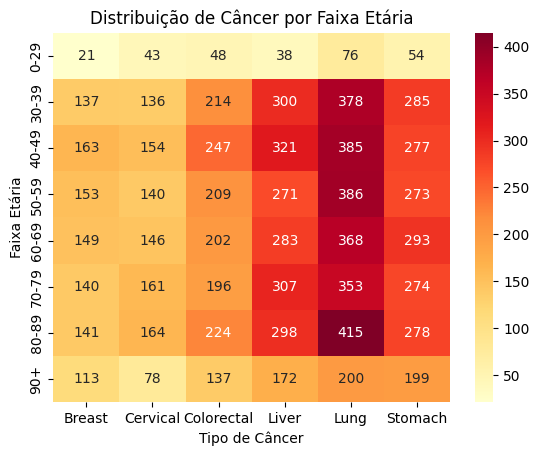

In [7]:
idades =  [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
tabela_idade_cancer = pd.crosstab(pd.cut(df["Age"], bins=idades, labels=labels, right=False),df["TumorType"])

sns.heatmap(tabela_idade_cancer, annot=True, fmt="d", cmap="YlOrRd")
plt.xlabel("Tipo de Câncer")
plt.ylabel("Faixa Etária")
plt.title("Distribuição de Câncer por Faixa Etária")
plt.show()


# **Frequência de Tipos de Câncer Conforme o Gênero Registrado**

* Os câncer que afetam principalmente todos os gêneros(Colorretal, Fígado, Pulmão, Estómago), não obteve disparidade drástica entre homens e mulheres. Contudo os câncer de Mama e Colo do Útero teve maiores casos no gênero feminino.

* O câncer de **Pulmão** teve o pico mais altos comparado aos demais tipos de câncer, isto é um alerta para a população.

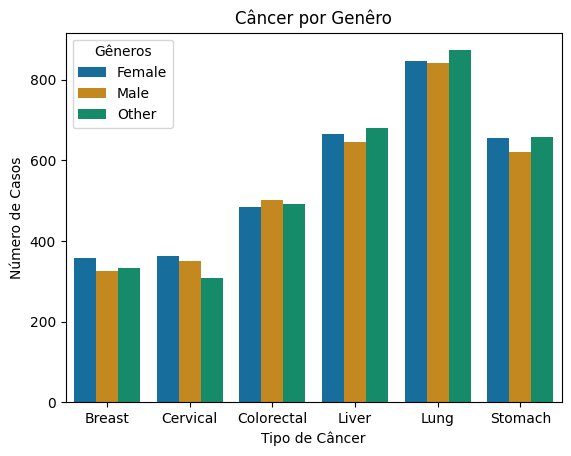

In [112]:
tabela_genero_cancer = (df.groupby(["TumorType", "Gender"]).size().reset_index(name="Contagem"))
sns.barplot(tabela_genero_cancer, x="TumorType", y="Contagem", hue="Gender", palette="colorblind")
plt.title("Câncer por Genêro")
plt.ylabel("Número de Casos")
plt.xlabel("Tipo de Câncer")
plt.legend(title="Gêneros")
plt.savefig("Grafico de cancer por genero")

# **Distribuição de Casos de Câncer por Tipo e Província na China**

Percebemos que na província **Guangdong** tem o maior salto comparado com os demais mas isso ocorre pois a cidade tem uma das maiores populações da China.
Contudo percebemos que o cãncer de **Pulmão** se destanca em todas as províncias.

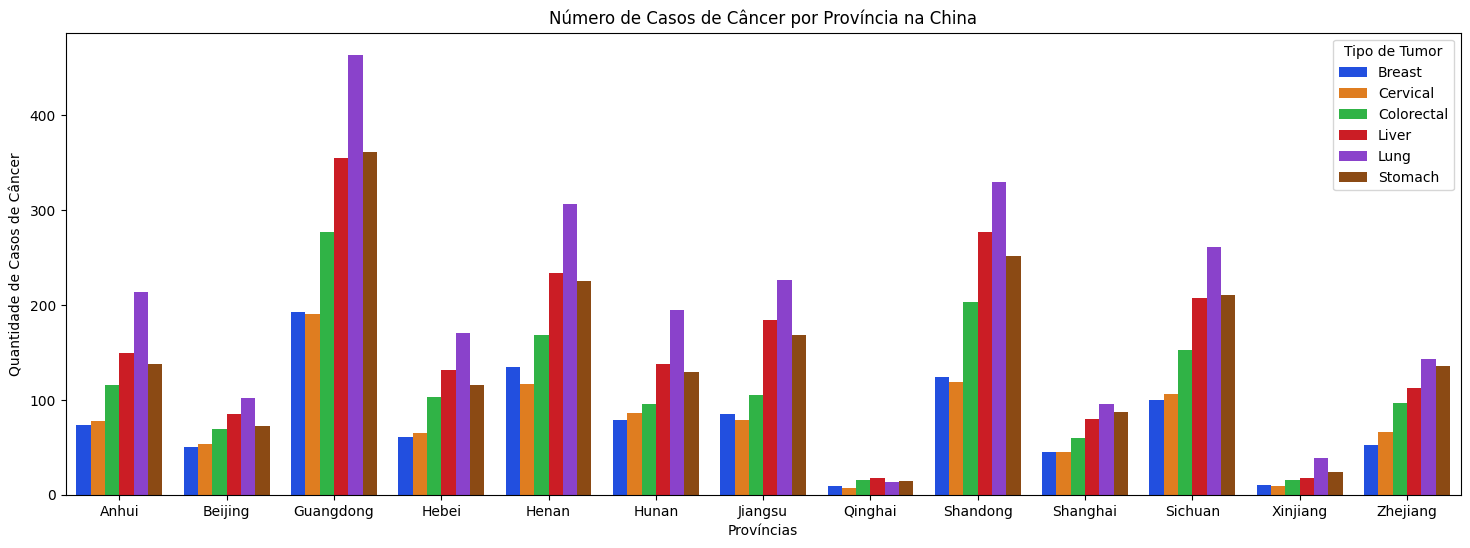

In [10]:
cancer_regiao = (df.groupby(["TumorType", "Province"]).size().reset_index(name="Contagem Local"))
plt.figure(figsize=(18,6))
sns.barplot(cancer_regiao, x="Province", y="Contagem Local", hue="TumorType", palette="bright")
plt.title("Número de Casos de Câncer por Província na China")
plt.xlabel("Províncias")
plt.ylabel("Quantidade de Casos de Câncer")
plt.legend(title="Tipo de Tumor")
plt.show()

# **Tratamentos Utilizados**

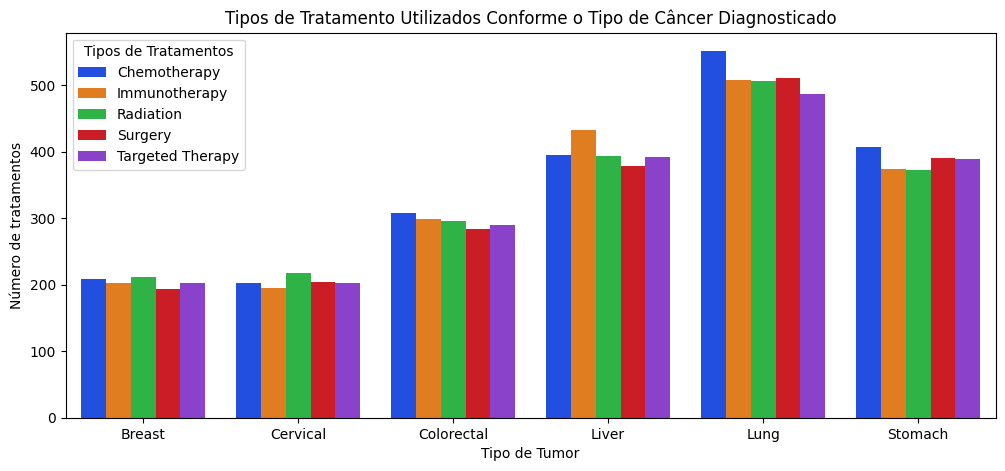

In [11]:
tratamento_cancer = (df.groupby(["TumorType", "TreatmentType"]).size().reset_index(name="Tratamento por Cancer"))
plt.figure(figsize=(12,5))
sns.barplot(tratamento_cancer, x="TumorType", y ="Tratamento por Cancer", hue="TreatmentType", palette="bright")
plt.title("Tipos de Tratamento Utilizados Conforme o Tipo de Câncer Diagnosticado")
plt.xlabel("Tipo de Tumor")
plt.ylabel("Número de tratamentos")
plt.legend(title = "Tipos de Tratamentos")
plt.show()

# **Padrões no Diagnóstico do Câncer: Uma Análise dos Estágios Clínicos por Tipo de Tumor**

O gráfico representa a quantidade de casos de câncer diagnosticados seperados por estágios.

*   O **Câncer de Pulmão** é o mais presente em todos os estágios, especialmente nos estágios II e III.

*   Os diagnósticos teve o maior pico nos estágios  II e III, isto pode indicar que seja detectada nos estágios intermediário, em vez do seu estágio inicial (I) ou no último estágio(IV).

*   O estágio(IV) obteve uma queda drástica em todos os tipos de câncer portanto isso pode indicar que obteve sucesso na **dectecção precoce**, permitindo que a maioria dos cânceres seja diagnosticada antes de atingir o estágio(IV). Contudo também pode indicar que o estágio(IV) pode progredir tão rapidamente que o paciente falece antes do diagnóstico seja registrado.

*   O câncer de **Mama** apresenta uma quantidade relativamente estável de diagnóstico nos estágios I, II, III. Isso pode refletir a eficácia de campanhas como o **Outubro Rosa**.



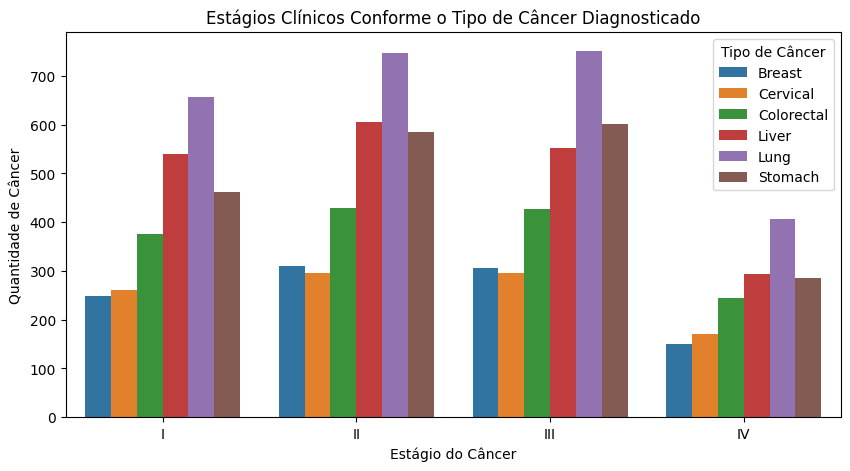

In [108]:
cancer_estagio = (df.groupby(["TumorType", "CancerStage"]).size().reset_index(name="Contagem de cancer por estagio"))
plt.figure(figsize=(10,5))
sns.barplot(cancer_estagio, x="CancerStage", y="Contagem de cancer por estagio", hue="TumorType")
plt.title("Estágios Clínicos Conforme o Tipo de Câncer Diagnosticado")
plt.xlabel("Estágio do Câncer")
plt.ylabel("Quantidade de Câncer")
plt.legend(title="Tipo de Câncer")
plt.show()

# **Estágio pelo Gêneros**

Não há uma disparidade significativa que sugira que um gênero é diagnosticado em um determinado estágio muito mais do que outro. Por exemplo, no Estágio II, os três gêneros têm contagens altíssimas e quase idênticas.

Assim como nos gráficos anteriores, há uma queda acentuada no número de casos do Estágio III para o Estágio IV para todos os gêneros.
Isso solidifica a ideia de que o Estágio IV  é menos frequentemente registrado no momento do diagnóstico inicial em comparação com os estágios II e III. As possíveis razões para isso continuam válidas.

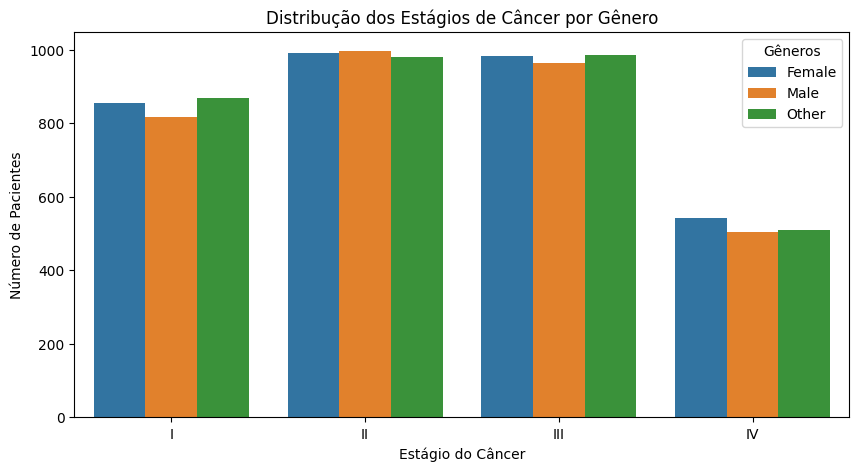

In [110]:
estagio_genero = (df.groupby(["Gender", "CancerStage"]).size().reset_index(name="Tratamento por genero"))
plt.figure(figsize=(10,5))
sns.barplot(estagio_genero, x="CancerStage", y="Tratamento por genero", hue="Gender")
plt.title("Distribução dos Estágios de Câncer por Gênero")
plt.xlabel("Estágio do Câncer")
plt.ylabel("Número de Pacientes")
plt.legend(title="Gêneros")
plt.show()

# **Influência do Consumo de Álcool na Progressão do Câncer**
Cânceres de **Fígado** e **Estômago** têm contagens muito altas, rivalizando com o de Pulmão. Isso está alinhado com o conhecimento médico de que o consumo de álcool é um fator de risco bem estabelecido para estes tipos de câncer. O gráfico pode estar refletindo fracamente essa associação conhecida.

Observando apenas os dois grupos com dados informados, notamos um padrão consistente: para quase todos os tipos de câncer, há um número maior de casos no grupo "Ocasional" do que no grupo "Pesado". É muito importante não concluir que o consumo "Ocasional" é mais arriscado que o consumo "Pesado" pois talvez os dados apresentados teve uma população maior identificado "Ocasional".

O grupo "Não Informado" não contém informação sobre o uso de álcool, isto representra limitações sobre a análise.

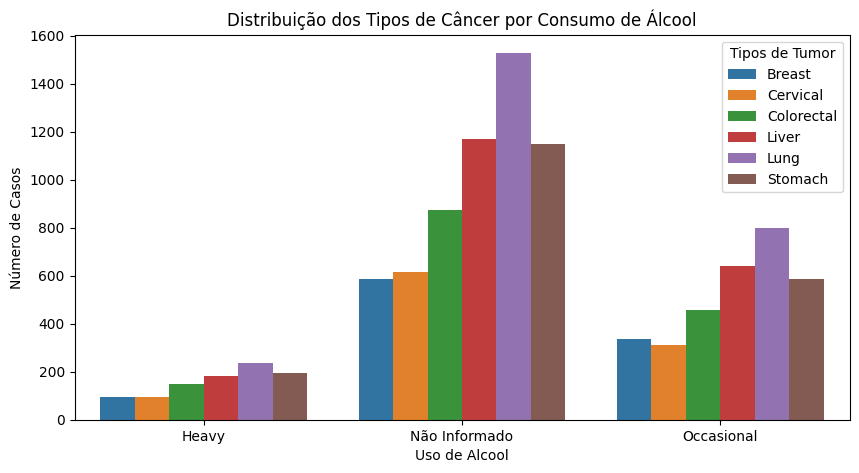

In [107]:
df["AlcoholUse"] = df["AlcoholUse"].fillna("Não Informado")
cancer_alcool = (df.groupby(["TumorType", "AlcoholUse"]).size().reset_index(name="Cancer x Alcool"))
plt.figure(figsize=(10,5))
sns.barplot(cancer_alcool, x="AlcoholUse", y="Cancer x Alcool", hue="TumorType")
plt.title("Distribuição dos Tipos de Câncer por Consumo de Álcool")
plt.xlabel("Uso de Alcool")
plt.ylabel("Número de Casos")
plt.legend(title="Tipos de Tumor")
plt.show()

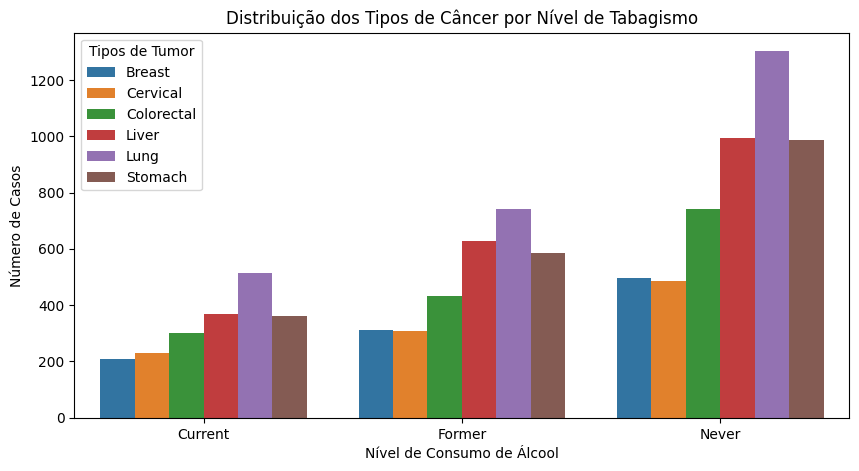

In [14]:
cancer_fuma = (df.groupby(["TumorType", "SmokingStatus"]).size().reset_index(name="Cancer x fuma"))
plt.figure(figsize=(10,5))
sns.barplot(cancer_fuma, x="SmokingStatus", y="Cancer x fuma", hue="TumorType")
plt.title("Distribuição dos Tipos de Câncer por Nível de Tabagismo")
plt.xlabel("Nível de Consumo de Álcool")
plt.ylabel("Número de Casos")
plt.legend(title="Tipos de Tumor")
plt.show()

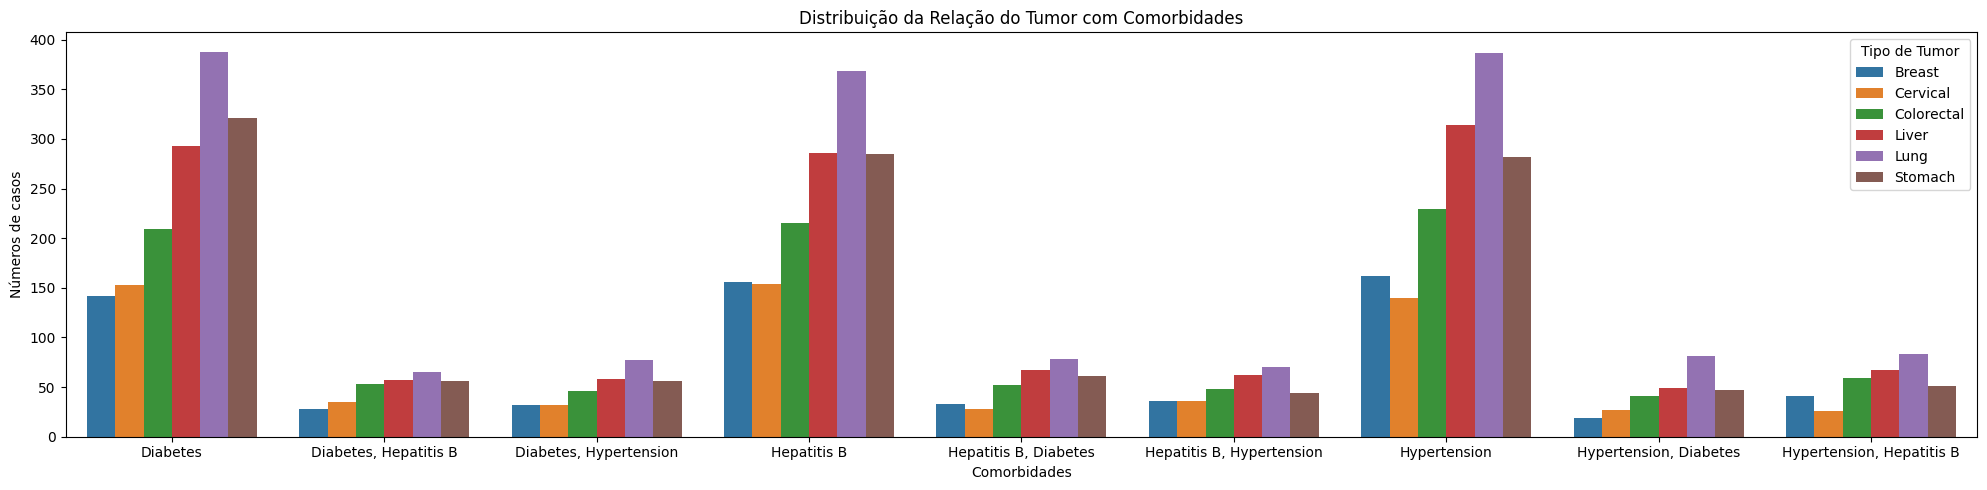

In [15]:
cancer_cormo = (df.groupby(["TumorType", "Comorbidities"]).size().reset_index(name="Comorbidade x cancer"))
plt.figure(figsize=(20,5))
sns.barplot(cancer_cormo, x="Comorbidities", y="Comorbidade x cancer", hue="TumorType")
plt.title("Distribuição da Relação do Tumor com Comorbidades")
plt.xlabel("Comorbidades")
plt.ylabel("Números de casos")
plt.legend(title="Tipo de Tumor", loc='upper right')
plt.tight_layout()
plt.show()

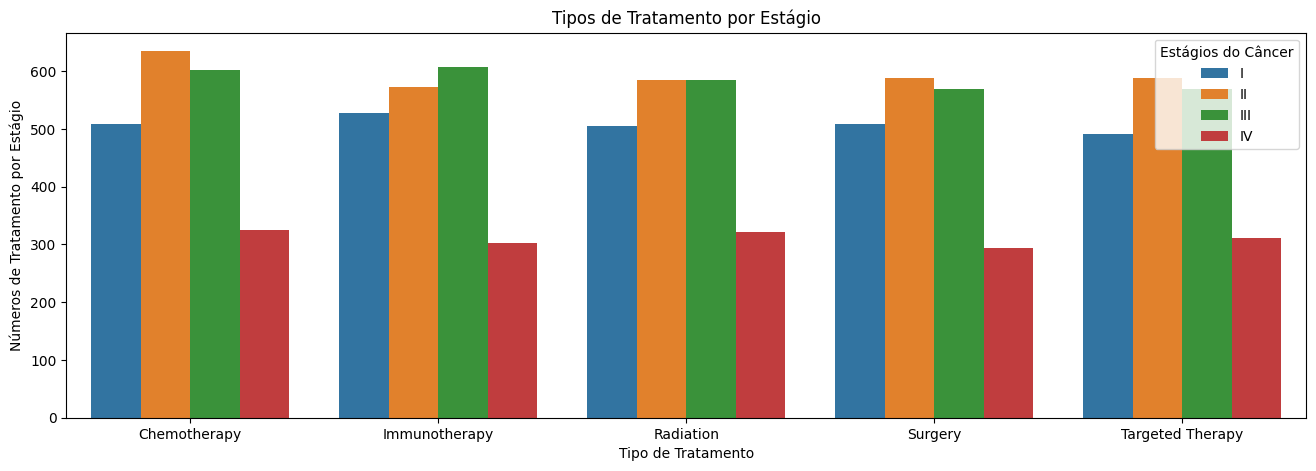

In [16]:
tratamento_estagio = (df.groupby(["TreatmentType", "CancerStage"]).size().reset_index(name="Tratamento por estagio"))
plt.figure(figsize=(16,5))
sns.barplot(tratamento_estagio, x="TreatmentType", y="Tratamento por estagio", hue="CancerStage")
plt.title("Tipos de Tratamento por Estágio")
plt.xlabel("Tipo de Tratamento")
plt.ylabel("Números de Tratamento por Estágio")
plt.legend(title="Estágios do Câncer")

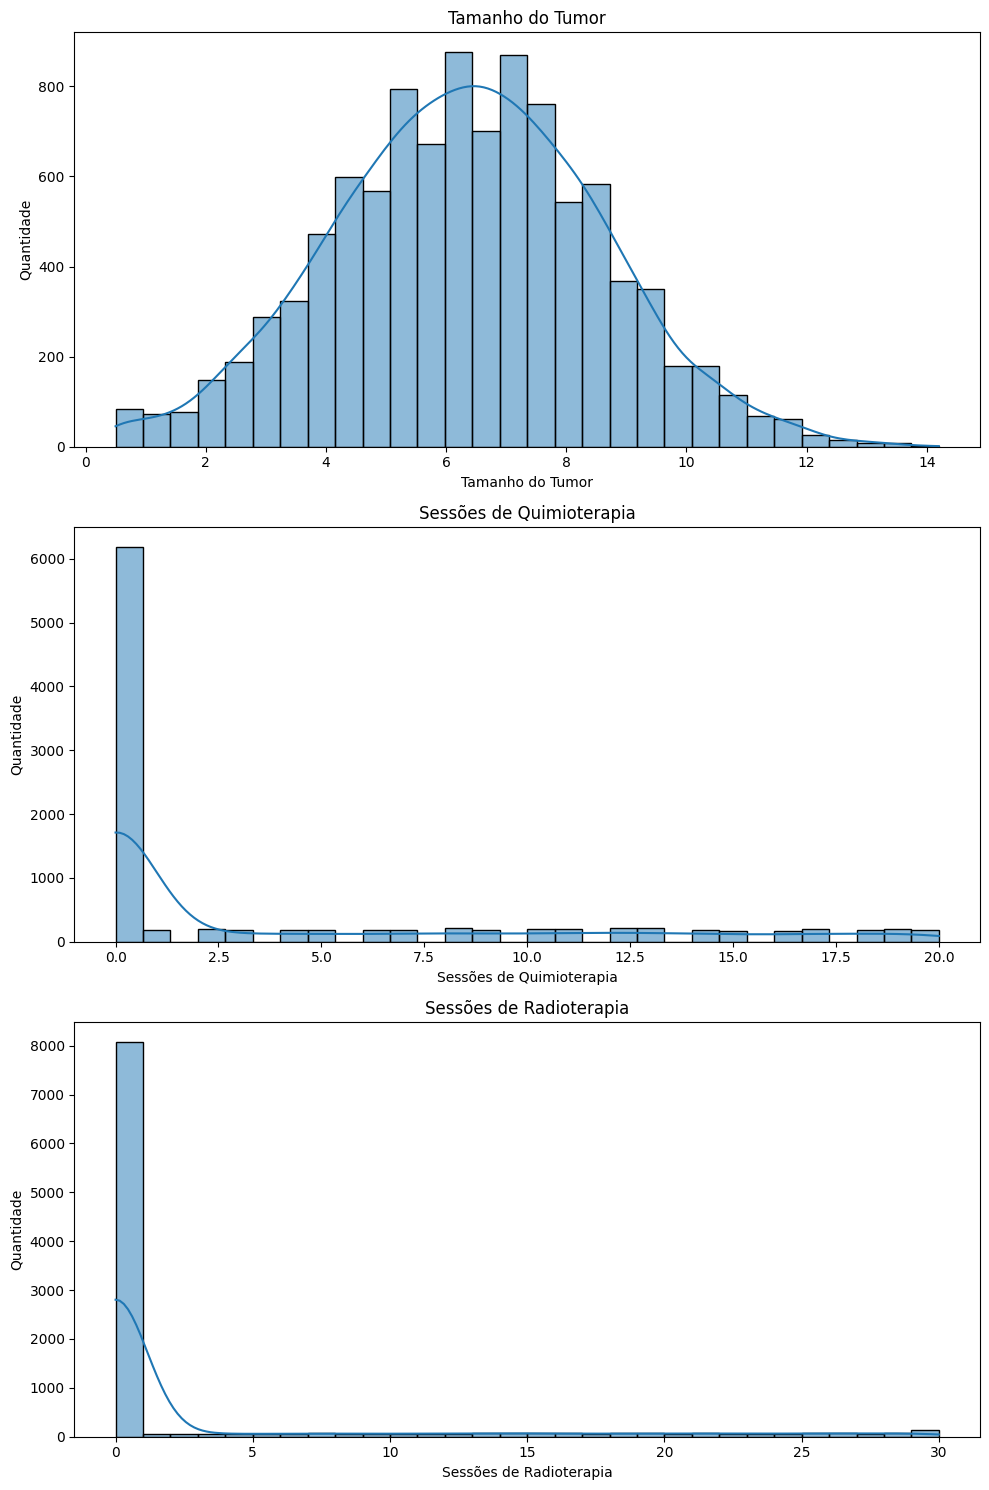

In [18]:
plt.style.use("default")
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
sns.histplot(df["TumorSize"], bins=30, kde=True, ax=axs[0])
axs[0].set_title("Tamanho do Tumor")
axs[0].set_xlabel("Tamanho do Tumor")
axs[0].set_ylabel("Quantidade")

sns.histplot(df["ChemotherapySessions"], bins=30, kde=True, ax=axs[1])
axs[1].set_title("Sessões de Quimioterapia")
axs[1].set_xlabel("Sessões de Quimioterapia")
axs[1].set_ylabel("Quantidade")

sns.histplot(df["RadiationSessions"], bins=30, kde=True, ax=axs[2])
axs[2].set_title("Sessões de Radioterapia")
axs[2].set_xlabel("Sessões de Radioterapia")
axs[2].set_ylabel("Quantidade")

plt.tight_layout()
plt.show()

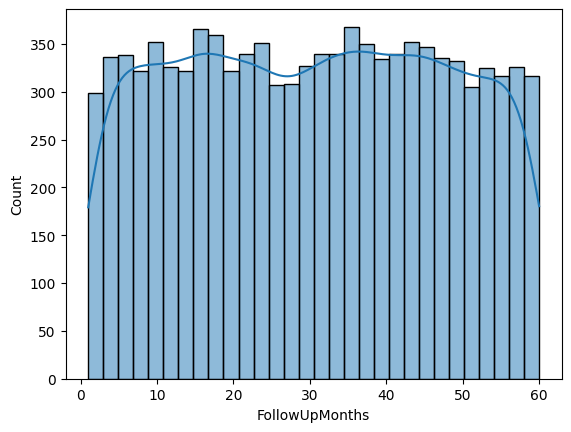

In [19]:
sns.histplot(df["FollowUpMonths"], bins=30, kde=True)
plt.show()

# **Como o Tipo de Tumor Influencia a Duração do Seguimento?**

O gráfico de **BoxPlot** apresenta resultados similares nos 6 tipos de cânceres.
O tempo médio entre os cânceres o pacoente foi acompanhada por aproximadamente 30 meses (2,5 anos). Portanto o câncer de **Fígado** tem um tempo de acompanhamento menor que os demais que pode infelizmente, esta relacionado ao tempo de sobreviência.

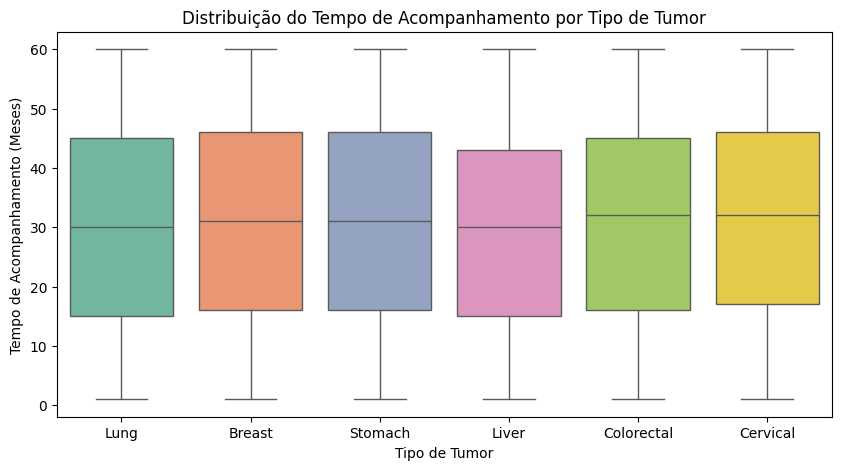

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(df, x="TumorType", y="FollowUpMonths", hue="TumorType", palette="Set2")
plt.title("Distribuição do Tempo de Acompanhamento por Tipo de Tumor")
plt.xlabel("Tipo de Tumor")
plt.ylabel("Tempo de Acompanhamento (Meses)")
plt.show()

# **Status de Sobrevivência dos Pacientes**

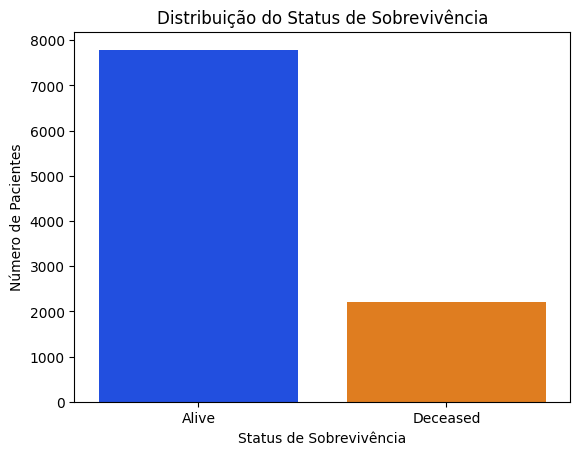

In [21]:
contagem_vida = df["SurvivalStatus"].value_counts().reset_index(name="Contagem")
sns.barplot(contagem_vida, x="SurvivalStatus", y="Contagem", hue="SurvivalStatus", palette="bright")
plt.title("Distribuição do Status de Sobrevivência")
plt.xlabel("Status de Sobrevivência")
plt.ylabel("Número de Pacientes")
plt.show()

# **Tempo de Acompanhamento por Estágio do Câncer**

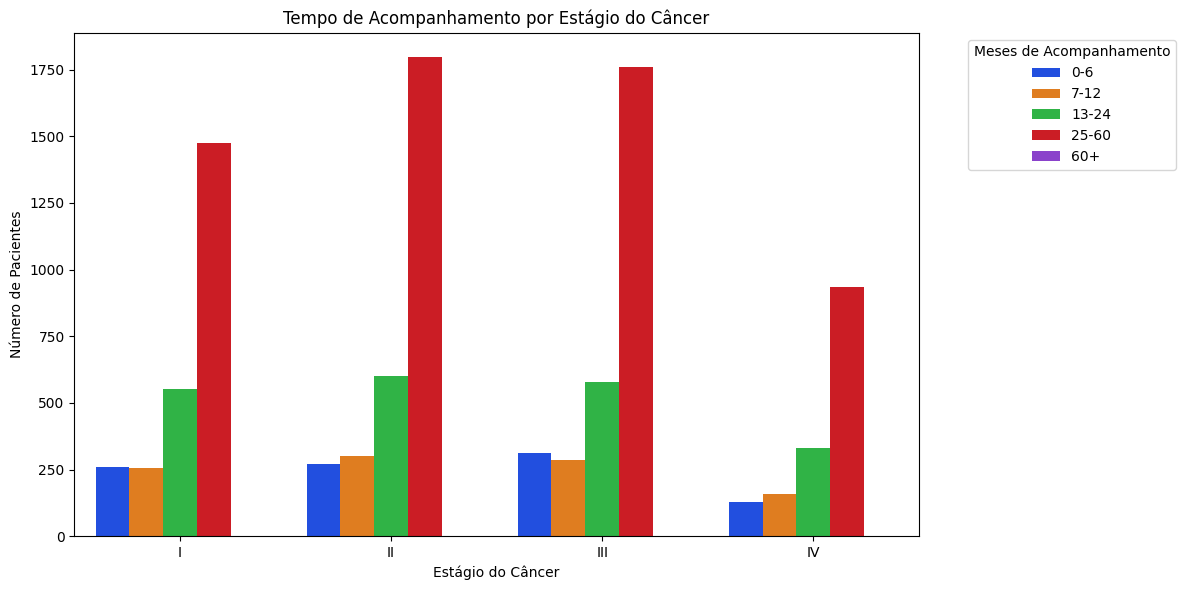

In [22]:
df['Acompanhamento estagio'] = pd.cut(df['FollowUpMonths'], bins=[0, 6, 12, 24, 60, 120], labels=["0-6", "7-12", "13-24", "25-60", "60+"])
estagio_tempo = df.groupby(["CancerStage", "Acompanhamento estagio"],observed=True).size().reset_index(name="Contagem")
plt.figure(figsize=(12,6))
sns.barplot(data=estagio_tempo, x="CancerStage", y="Contagem", hue="Acompanhamento estagio", palette="bright")
plt.title("Tempo de Acompanhamento por Estágio do Câncer")
plt.xlabel("Estágio do Câncer")
plt.ylabel("Número de Pacientes")
plt.legend(title="Meses de Acompanhamento", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# **Comparação dos Estágios de Câncer nas Diferentes Faixas Etárias**

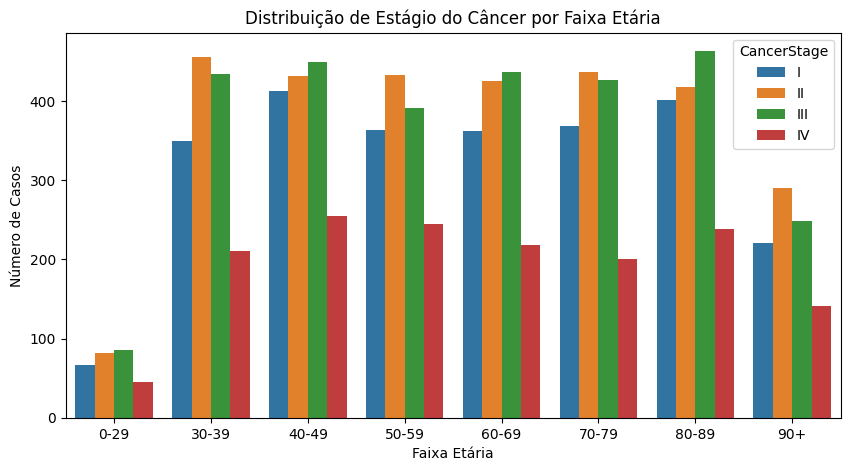

In [23]:
df["Faixa Etaria"] = pd.cut(df["Age"], bins=idades, labels=labels, right=False)
idade_estagio = (df.groupby(["Faixa Etaria", "CancerStage"], observed=False).size().reset_index(name="Idade Estagio"))
plt.figure(figsize=(10,5))
sns.barplot(idade_estagio, x="Faixa Etaria", y="Idade Estagio", hue="CancerStage")
plt.title("Distribuição de Estágio do Câncer por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Casos")
plt.show()

# **Análise de Sessões de Tratamento por Estágio do Câncer**


Podemos Perceber que a quantidade de ***Quimioterapia*** e **Radioterapia**, tem uma quantidade muitos proximas de sessões indepentende do nivel de estágio.

Os Gráficos de **Boxplots**, apresentou resultados diferentes pois nas sessões de **Radioterapia** apresentou que abaixo dos 50% dos pacientes não obteve sessões do tratamento. Contudo as sessões de **Quimioterapia** teve pelo menos 7 sesões do tratamento ate 20 sessões.



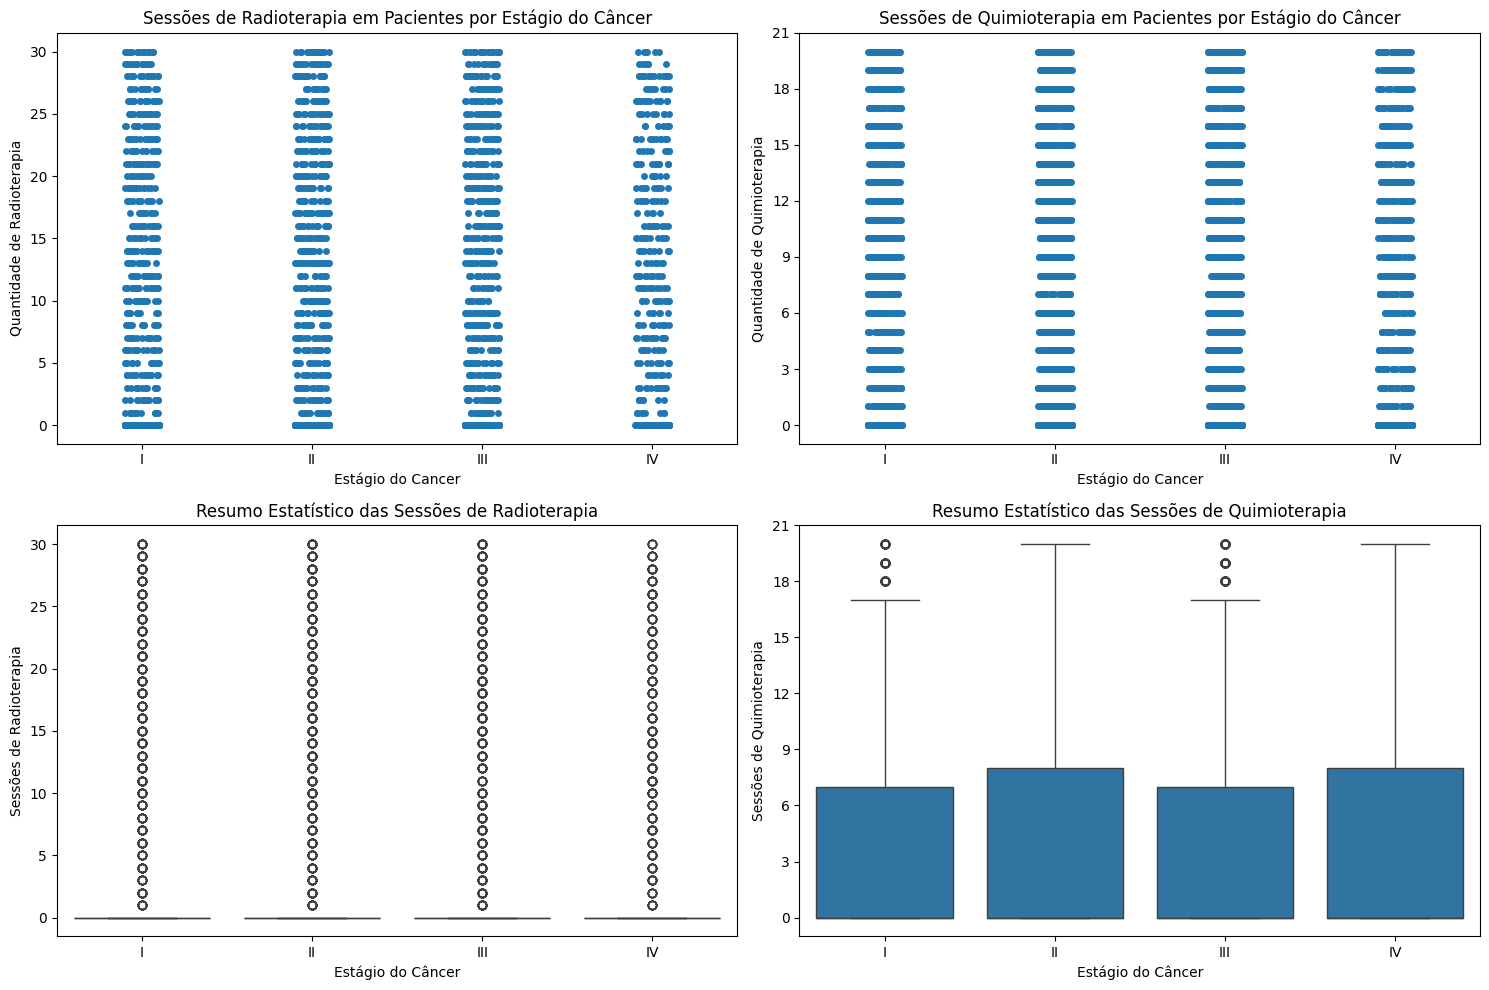

In [106]:
estagio_ordem = ["I", "II", "III", "IV"]

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.stripplot(df , x="CancerStage", y="RadiationSessions", jitter=True, order=estagio_ordem)
plt.title("Sessões de Radioterapia em Pacientes por Estágio do Câncer")
plt.xlabel("Estágio do Cancer")
plt.ylabel("Quantidade de Radioterapia")

plt.subplot(2,2,2)
ax = sns.stripplot(df , x="CancerStage", y="ChemotherapySessions", jitter=True,  order=estagio_ordem)
plt.title("Sessões de Quimioterapia em Pacientes por Estágio do Câncer")
plt.xlabel("Estágio do Cancer")
plt.ylabel("Quantidade de Quimioterapia")
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x="CancerStage", y="RadiationSessions",  order=estagio_ordem)
plt.title("Resumo Estatístico das Sessões de Radioterapia")
plt.xlabel("Estágio do Câncer")
plt.ylabel("Sessões de Radioterapia")

plt.subplot(2, 2, 4)
ax = sns.boxplot(data=df, x="CancerStage", y="ChemotherapySessions",  order=estagio_ordem)
plt.title("Resumo Estatístico das Sessões de Quimioterapia")
plt.xlabel("Estágio do Câncer")
plt.ylabel("Sessões de Quimioterapia")
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

,RadiationSessions,Radioterapia Estagio
count,124.000000,124.000000
mean,15.000000,80.645161
std,8.980557,365.179078
min,0.000000,5.000000
25%,7.000000,12.750000
50%,15.000000,17.000000
75%,23.000000,20.000000
max,30.000000,2408.000000
